# Lista 3: Gabarito

# Problema 1 (a)

In [3]:
def numerical_derivative(func, p, h=1e-10):
    
    """
    Computes the numerical derivative of a function.
    
    Parameters:
    
    func: a function;
    
    p: a float object;
    
    Options:
    
    h: an upper bound on the approximation error;
    """
    
    num = func(p + h) - func(p)
    den = h
    
    return num / den

**Exemplo:** considere a aplicação $f: [0, 1] \to \mathbb{R}$ dada por $f(t) = t^{2} - 5t$. Sabemos que sua derivada analítica é dada por $f': [0, 1] \to \mathbb{R}$ com $f'(t) = 2t - 5$. Assim, $f'(0.5) = -4$. Vejamos se nossa função retorna algo próximo de $-4$.

In [4]:
numerical_derivative(lambda t: t ** 2 - 5 * t, 0.5)

-4.000000330961484

# Problema 1 (b)

In [5]:
def numerical_derivatives(func, p, method="forward", h=1e-10):
    
    """
    Computes the numerical derivative of a function.
    
    Parameters:
    
    func: a function;
    
    p: a float object;
    
    Options:
    
    h: an upper bound on the approximation error;
    
    method: selects the formula for computing the derivative;
    """
    
    if (method == "forward"):
    
        num = func(p + h) - func(p)
        den = h
    
    elif (method == "central"):
        
        num = func(p + h) - func(p - h)
        den = h + h
    
    elif (method == "backward"):
        
        num = func(p) - func(p - h)
        den = h
        
    return num / den

In [6]:
methods = ["forward", "central", "backward"]

[numerical_derivatives(lambda t: t ** 2 - 5 * t, 0.5, method=m) for m in methods]

[-4.000000330961484, -4.000000330961484, -4.000000330961484]

# Problema 1 (c)

In [7]:
import numpy as np

In [8]:
def critical_points(func, a, b, s=0.01, eps=1e-5):
    
    """
    Computes the critical points of a function.
    
    Parameters:
    
    func: a function;
    
    a, b: extremities for the interval where func is defined on;
    
    Options:
    
    s: determines the step size when partitioning the domain;

    eps: an upper bound on the approximation error;
    """
    
    mesh = np.arange(a, b, s)
    
    crit = [c for c in mesh if abs(numerical_derivative(func, c)) <= eps]
    
    return crit

**Exemplo:** vamos olhar novamente para a função do exemplo anterior, estendida para [0, 5]. Sabemos que seus pontos críticos serão os pontos $c \in (0, 5)$ tais que $2t -5 = 0$, ou seja, há um único ponto crítico: $t^{*} = 2.5$.

In [9]:
critical_points(lambda t: t ** 2 - 5 * t, 0, 5)

[2.5]

In [10]:
import matplotlib.pyplot as plt

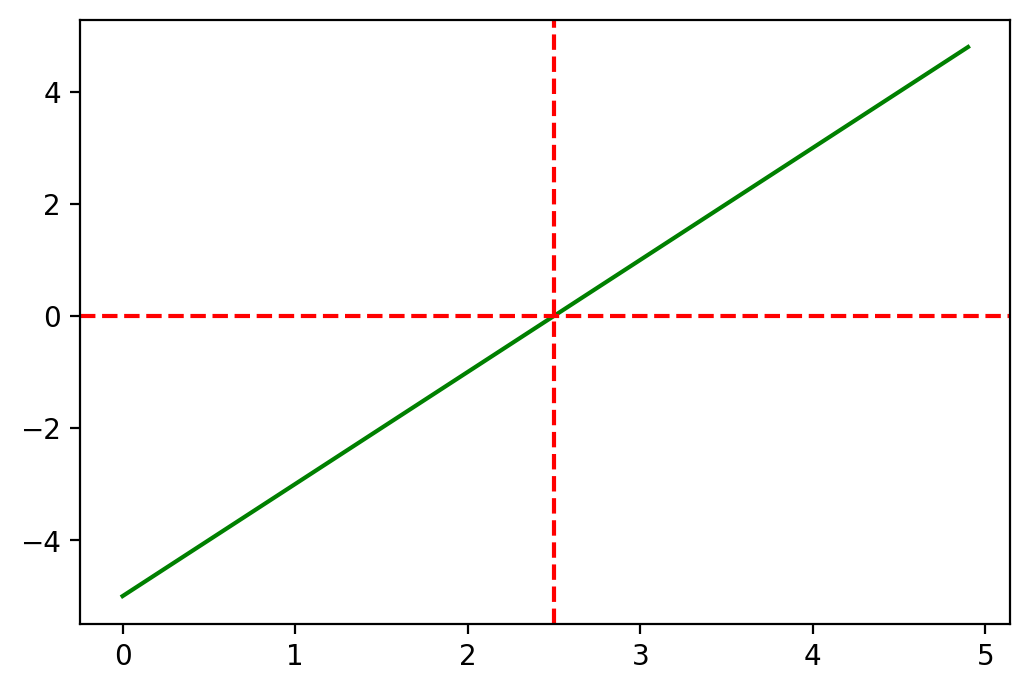

In [11]:
x = np.arange(0, 5, 0.1)

y = 2 * x - 5

plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()

ax.plot(x, y, 'g')

plt.axhline(color='r', ls='--')
plt.axvline(x=2.5, color='r', ls='--')

# Divagação: *Walrus Operator*

**Observação.** O *walrus operator*, `:=`, foi implementado em 2019 pela desenvolvedora Emily Morehouse. Nas palavras dela:

> In most contexts where arbitrary Python expressions can be used, a named expression can appear. This is of the form `NAME := expr` where `expr` is any valid Python expression other than an unparenthesized tuple, and `NAME` is an identifier.

> The value of such a named expression is the same as the incorporated expression, with the additional side-effect that the target is assigned that value.

Abaixo, temos um exemplo bastante simples que ilustra a elegância deste operador:

In [12]:
i = 0

while (i := i + 1) < 5:
    
    print(i)

1
2
3
4


In [13]:
import numpy as np

# Problema 2 (a)

In [14]:
def My_Newton(func, g, eps=1e-10, maxiter=100, verbose=True):
    
    """
    Searches for zeros of a a function using Newton's method.
    
    Parameters:
    
    func: a function;
    
    g: an initial guess;
    
    Options:
    
    eps: an upper bound on the approximation error;
    
    maxiter: max. number of iterations allowed;
    """
    
    i = 0
    
    while abs(func(g)) > eps and (i := i + 1) < maxiter:
        
        g = g - func(g) / numerical_derivative(func, g)
        
    if (i >= maxiter):
        
        return "Deu ruim."
    
    elif (verbose == True):
        
        return f"{g} é um zero da função. Foram necessárias {i} iterações."
    
    else:
        
        return g

# Problema 2 (b)

In [15]:
My_Newton(lambda x: np.log(x), 0.5)

'0.9999999999999998 é um zero da função. Foram necessárias 5 iterações.'

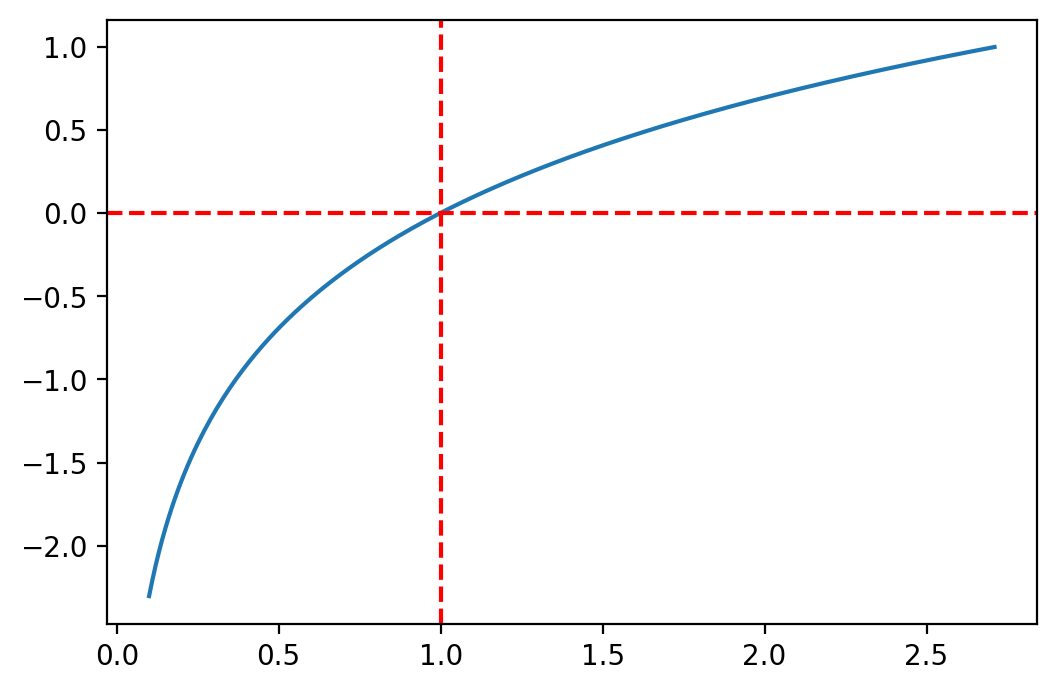

In [13]:
x = np.arange(0.1, np.e, 0.01)
y = np.log(x)

plt.plot(x, y)

plt.axhline(color='r', ls='--')
plt.axvline(x=1, color='r', ls='--')

In [16]:
My_Newton(lambda x: - x ** 2 - 7 * x + 17, 0.5)

'1.9083269131976357 é um zero da função. Foram necessárias 4 iterações.'

In [17]:
- 1.9 ** 2 - 7 * 1.9 + 17

0.08999999999999986

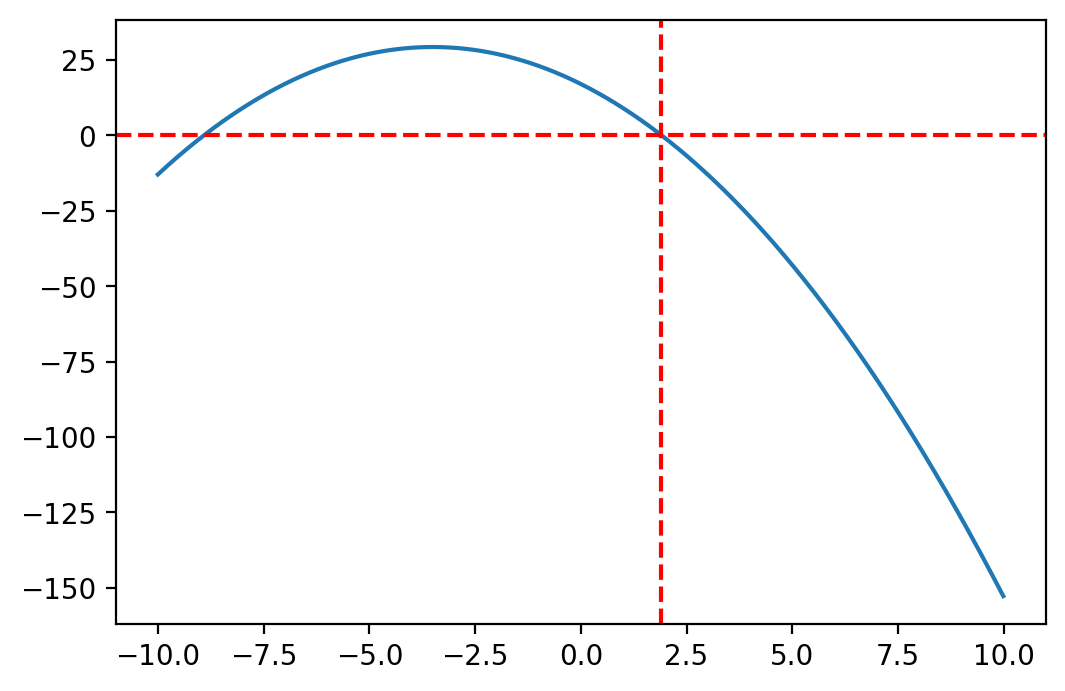

In [15]:
x = np.arange(-10, 10, 0.01)
y = - x ** 2 - 7 * x + 17

plt.plot(x, y)
plt.axhline(color='r', ls='--')
plt.axvline(x=1.90832, color='r', ls='--')

In [18]:
My_Newton(lambda x: np.cos(np.exp(x)), 0.5)

'0.45158270528947664 é um zero da função. Foram necessárias 3 iterações.'

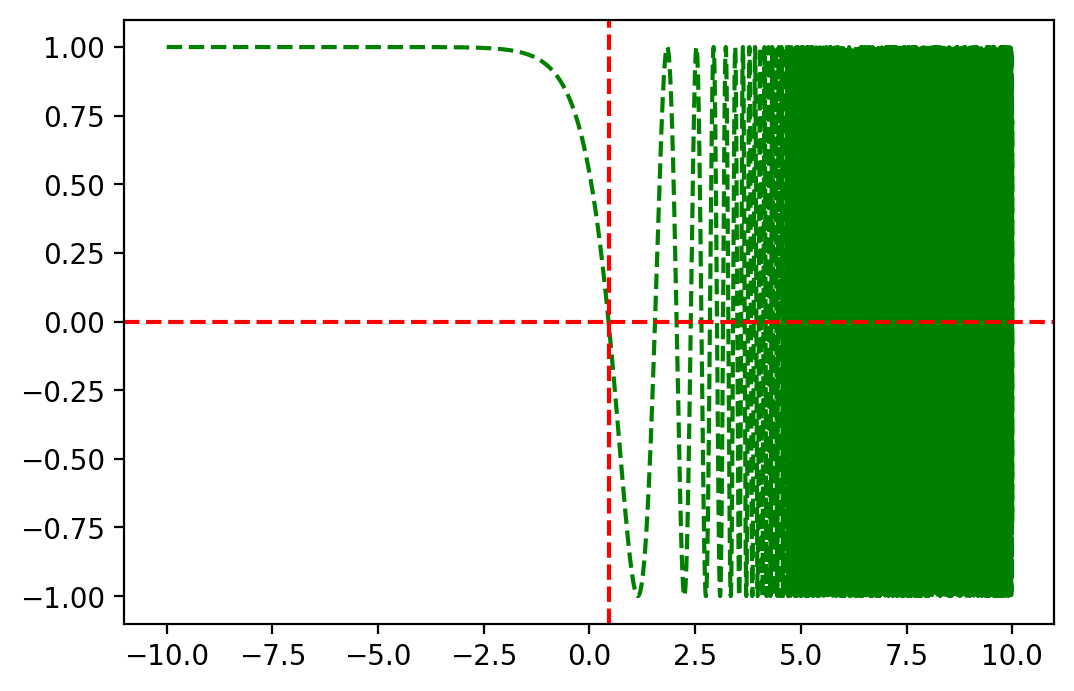

In [17]:
x = np.arange(-10, 10, 0.001)
y = np.cos(np.exp(x))

plt.plot(x, y, 'g--')
plt.axhline(color='r', ls='--')
plt.axvline(x=0.4515827, color='r', ls='--')

# Problema 2 (c)

A ideia aqui é idêntica à da lista anterior, quando usávamos o método da bissecção.

In [18]:
for num in [25, 64, 1024, 666, 42]:
    
    print(f"A raiz quadrada de {num} é aproximadamente {My_Newton(lambda x: x ** 2 - num, 1, verbose=False)}")

A raiz quadrada de 25 é aproximadamente 5.0
A raiz quadrada de 64 é aproximadamente 7.999999999999968
A raiz quadrada de 1024 é aproximadamente 32.0
A raiz quadrada de 666 é aproximadamente 25.806975801126967
A raiz quadrada de 42 é aproximadamente 6.480740698407919


# Problema 2 (d)

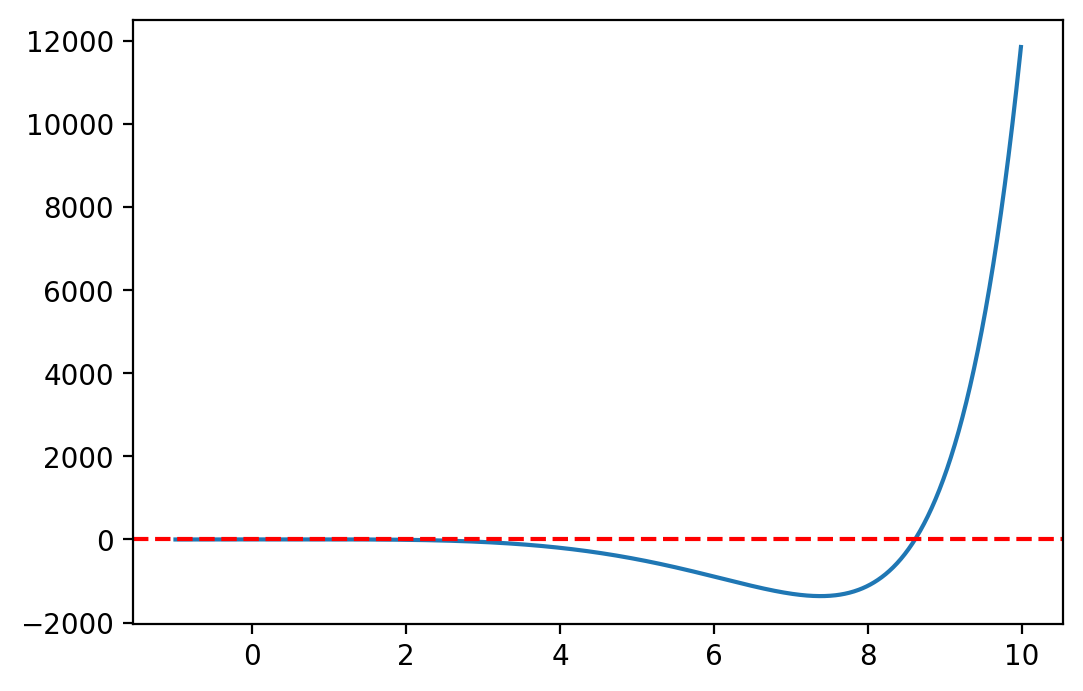

In [19]:
x = np.arange(-1, 10, 0.01)
y = np.exp(x) - x ** 4

plt.plot(x, y)
plt.axhline(color='r', ls='--')

In [20]:
My_Newton(lambda x: np.exp(x) - x ** 4, -1)

'-0.8155534188089607 é um zero da função. Foram necessárias 5 iterações.'

In [21]:
round(np.exp(-0.8155534188089607)) + round((0.8155534188089607 ** 4))

0.0

In [22]:
My_Newton(lambda x: np.exp(x) - x ** 4, 7)

'1.4296118247256169 é um zero da função. Foram necessárias 7 iterações.'

In [23]:
round(np.exp(1.4296118247256169)) - round(1.4296118247256169 ** 4)

0.0

Maior raiz está à direita do 8. Sendo assim, use 8 como palpite inicial.

In [24]:
My_Newton(lambda x: np.exp(x) - x ** 4, 8)

'8.6131694564414 é um zero da função. Foram necessárias 7 iterações.'

In [25]:
round(np.exp(8.6131694564414)) - round(8.613169456441 ** 4)

0.0

# Problema 2 (d)

In [26]:
def bisect(func, a, b, eps=1e-10, maxiter=1000):
    
    i = 0
    
    while (i := i + 1) < maxiter:
        
        c = (a + b) / 2
        
        if func(c) == 0 or (b-a)/2 <= eps:
            
            return c
        
        elif np.sign(func(a)) == np.sign(func(c)):
            
            a = c
            
        else:
            
            b = c
            
    return c

In [27]:
def My_Newton_Improved(func, g, a, b, eps=1e-10, maxiter=100):
    
    """
    Searches for zeros of a a function using Newton's method.
    
    Parameters:
    
    func: a function;
    
    g: an initial guess;
    
    a, b: extremities of the interval where func is defined;
    
    Options:
    
    eps: an upper bound on the approximation error;
    
    maxiter: max. number of iterations allowed;
    """
    
    i = 0
    
    while abs(func(g)) > eps and (i := i + 1) < maxiter:
        
        if abs(numerical_derivative(func, g)) <= eps:
            
            return bisect(func, a, b)
        
        else:
            
            g = g - func(g) / numerical_derivative(func, g)
            
    if i >= maxiter:
        
        return "Deu ruim!"
    
    else:
        
        return g

In [28]:
 My_Newton(lambda x: np.sin(x), np.pi/2) #-inf não está no domínio.

<ipython-input-11-0a1d13e8382a>:23: RuntimeWarning: divide by zero encountered in double_scalars
  g = g - func(g) / numerical_derivative(func, g)
<ipython-input-28-43a09ec73926>:1: RuntimeWarning: invalid value encountered in sin
  My_Newton(lambda x: np.sin(x), np.pi/2) #-inf não está no domínio.


'-inf é um zero da função. Foram necessárias 1 iterações.'

In [29]:
My_Newton_Improved(lambda x: np.sin(x), g=np.pi/2, a=0.5, b=np.pi) #Agora deu certo.

3.1415926535129124

# Problema 2 (e)

O fluxo associado é $\phi = (-100, 40, 40, 40)$. Queremos computar a TIR, ou seja, queremos $i$ tal que:

$$NPV(\phi, i) = 0,$$

que equivale a:

$$-100 + \frac{40}{(1+i)} + \frac{40}{(1+i)^{2}} + \frac{40}{(1+i)^{3}} = 0$$

In [30]:
My_Newton_Improved(lambda x: -100 + 40/(1+x) + 40/(1+x)**2 + 40/(1+x)**3, g=0.5, a=-10, b=10)

0.09701025740320113

Segue que a TIR é aproximadamente $9.7$%.